# Telecom Churn Case Study

### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [130]:
df_telecom = pd.read_csv('telecom_churn_data.csv')
df_telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [131]:
df_telecom.shape

(99999, 226)

In [132]:
df_telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

### TODO 
Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. [‘two-months zero usage]
usage-based definition

##### Phases
    1. The ‘good’ phase
    2. Action phase
    3. Churn phase


1. Derive new features
2. Filter high-value customers
3. Tag churners and remove attributes of the churn phase

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9
    

### Modelling : Purpose
It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

 PCA
 
 techniques to handle class imbalance.
 
     Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

    Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

    Derive new features.

    Reduce the number of variables using PCA.

    Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

    Evaluate the models using appropriate evaluation metrics. Note that it is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

    Finally, choose a model based on some evaluation metric.


build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

Finally, recommend strategies to manage customer churn based on your observations.



    

    

### Data Preparation

In [133]:
pd.options.display.max_columns=300

df_telecom.describe([.5,.75,.90,.95,.99])


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
90%     7.002174e+09      109.0             0.0             0.0   
95%     7.002291e+09      109.0             0.0             0.0   
99%     7.002387e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
90%               0.0    620.075400    617.252000    618.160400    601.537000   
95%               0.0    829.488200    828.357200    833.303300    805.107200   
99%               0.0   1410.792540   1428.685880   1455.539960   1402.445660   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
90%      344.102000    348.035000    345.030000    342.890000    477.325000   
95%      612.407500    624.835500    620.690000    617.232500    727.879000   
99%     1431.760500   1478.533300   1480.334000   1445.766400   1539.535800   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
90%      480.431000    486.310000    471.031000      11.810000       5.060000   
95%      744.225000    734.860000    720.120500      40.640000      23.140000   
99%     1549.379500   1530.398000   1521.328700     219.847000     154.483200   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%         5.340000       3.630000      22.480000       9.930000   
95%        24.460000      19.240000      69.110000      42.9900

### 1. Finding high valued customers

In [134]:
df_telecom[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9']].describe([.25,.50,.70,.90,.95,.99])

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9
count      99999.000000      99999.000000      99999.000000      99999.000000
mean         327.514615        322.962970        324.157122        303.345673
std          398.019701        408.114237        416.540455        404.588583
min            0.000000          0.000000          0.000000          0.000000
25%          109.000000        100.000000         90.000000         52.000000
50%          230.000000        220.000000        225.000000        200.000000
70%          378.000000        370.000000        380.000000        355.000000
90%          732.000000        731.000000        736.000000        709.000000
95%          994.000000        993.000000        996.000000        968.000000
99%         1683.020000       1728.000000       1721.000000       1678.000000
max        35190.000000      40335.000000      45320.000000      37235.000000

##### :::: From above we can see 378 can be the amount to filterout the high valued customers, just to confirm this, we'll take the 70th percentile of sum of recharges in 1st 2 months

In [135]:
df_telecom['avg_rech_amt_6_7'] =  df_telecom[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)


In [136]:
df_telecom[['total_rech_amt_6','total_rech_amt_7','avg_rech_amt_6_7']].describe([.25,.50,.70,.90,.95,.99])

total_rech_amt_6  total_rech_amt_7  avg_rech_amt_6_7
count      99999.000000      99999.000000      99999.000000
mean         327.514615        322.962970        325.238792
std          398.019701        408.114237        370.833466
min            0.000000          0.000000          0.000000
25%          109.000000        100.000000        115.000000
50%          230.000000        220.000000        229.000000
70%          378.000000        370.000000        368.500000
90%          732.000000        731.000000        698.000000
95%          994.000000        993.000000        937.500000
99%         1683.020000       1728.000000       1590.000000
max        35190.000000      40335.000000      37762.500000

In [137]:
df_telecom[df_telecom.total_rech_amt_6>378].shape

(29972, 227)

##### :::: Filtering out the high valued customers based on recharge amount > 378

In [138]:
df_telecom = df_telecom[df_telecom.total_rech_amt_6>378]

In [139]:
df_telecom.shape

(29972, 227)

### 2. Tagging Churners

##### Marking churn =1 for Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase

In [140]:
#creating chrun col with no churn by default
df_telecom['churn']=0

In [141]:
df_telecom[(df_telecom.total_ic_mou_9==0) & (df_telecom.total_og_mou_9==0) & (df_telecom.vol_3g_mb_9==0) & (df_telecom.vol_2g_mb_9==0)]

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
7         7000701601        109             0.0             0.0   
35        7002108620        109             0.0             0.0   
97        7000589828        109             0.0             0.0   
111       7001300706        109             0.0             0.0   
117       7000674727        109             0.0             0.0   
...              ...        ...             ...             ...   
99851     7000565233        109             0.0             0.0   
99868     7000556474        109             0.0             0.0   
99885     7000229809        109             0.0             0.0   
99887     7001271496        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
7                 0.0            6/30/2014            7/31/2014   
35                0.0            6/30/2014            7/31/2014   
97                0.0            6/30/2014            7/31/2014   
111               0.0            6/30/2014            7/31/2014   
117               0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99851             0.0            6/30/2014                  NaN   
99868             0.0            6/30/2014            7/31/2014   
99885             0.0            6/30/2014            7/31/2014   
99887             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
7                8/31/2014            9/30/2014  1069.180  1349.850  3171.480   
35               8/31/2014            9/30/2014   596.376    13.448     0.000   
97               8/31/2014            9/30/2014   374.863   294.023   183.043   
111              8/31/2014            9/30/2014   596.301   146.073     0.000   
117              8/31/2014            9/30/2014   334.167    50.000     0.000   
...                    ...                  ...       ...       ...       ...   
99851                  NaN                  NaN   446.574     0.000     0.000   
99868            8/31/2014            9/30/2014   594.210   591.700   506.715   
99885            8/31/2014            9/30/2014   456.151   486.175   526.636   
99887            8/31/2014            9/30/2014   816.531   628.336   142.974   
99998            8/31/2014            9/30/2014   687.065     0.000     0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
7      500.000        57.84        54.68        52.29          NaN   
35       0.000        10.51          NaN          NaN          NaN   
97       0.000       433.59       415.66       221.06          NaN   
111      0.000        55.19         3.26          NaN          NaN   
117      1.050        19.54         8.93         0.00         0.00   
...        ...          ...          ...          ...          ...   
99851    0.000        11.29          NaN          NaN          NaN   
99868  200.145       230.93        73.76        55.93        48.19   
99885    8.750       741.94       931.84       966.33         4.74   
99887    0.010       326.06       299.59         8.61         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
7            453.43        567.16        325.91           NaN          16.23   
35           199.74           NaN           NaN           NaN         196.49   
97            74.54         43.66         31.86           NaN           0.00   
111           45.51         12.34           NaN           NaN           0.00   
117          559.99         16.28          0.00          0.13           1.24   
...             ...           ...           ...           ...            ...   
99851        280.88    

In [142]:
df_telecom.loc[(df_telecom.total_ic_mou_9==0) & (df_telecom.total_og_mou_9==0)& (df_telecom.vol_2g_mb_9==0)
              & (df_telecom.vol_3g_mb_9==0),'churn']=1

In [143]:
df_telecom.churn.value_counts()

0    26748
1     3224
Name: churn, dtype: int64

##### ::::: we have 3224 numbers marked to be churned

In [144]:
df_telecom.shape

(29972, 228)

In [145]:
churn_cols = [x for x in df_telecom.columns if x.endswith('_9')]
churn_cols

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [146]:
# dropping Churn columns from data
df_telecom.drop(churn_cols, inplace=True,axis=1)
df_telecom.shape

(29972, 174)

### 3. Derive new features

In [147]:
df_telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29972 entries, 6 to 99998
Data columns (total 174 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   arpu_6                    float64
 9   arpu_7                    float64
 10  arpu_8                    float64
 11  onnet_mou_6               float64
 12  onnet_mou_7               float64
 13  onnet_mou_8               float64
 14  offnet_mou_6              float64
 15  offnet_mou_7              float64
 16  offnet_mou_8              float64
 17  roam_ic_mou_6             float64
 18  roam_ic_mou_7             float64
 19  roam_ic_mou_8             float64
 20  roam_og_mou_6             f

In [149]:
df_telecom = df_telecom.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

In [151]:
df_telecom_corr = df_telecom.select_dtypes(['int64','float64']).corr()
df_telecom_corr

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
mobile_number            1.000000  0.008145  0.024585  0.032328    -0.014058   
arpu_6                   0.008145  1.000000  0.711188  0.633855     0.270666   
arpu_7                   0.024585  0.711188  1.000000  0.785328     0.174492   
arpu_8                   0.032328  0.633855  0.785328  1.000000     0.112339   
onnet_mou_6             -0.014058  0.270666  0.174492  0.112339     1.000000   
onnet_mou_7             -0.007933  0.207932  0.315429  0.219778     0.765769   
onnet_mou_8             -0.004752  0.181518  0.254204  0.325315     0.653840   
offnet_mou_6            -0.004961  0.436055  0.325625  0.243213    -0.021765   
offnet_mou_7             0.002701  0.342543  0.496749  0.373201    -0.025820   
offnet_mou_8             0.009542  0.297914  0.400159  0.506744    -0.019669   
roam_ic_mou_6            0.005653  0.107317  0.075094  0.070692     0.002303   
roam_ic_mou_7           -0.007391  0.090796  0.087229  0.076929     0.019695   
roam_ic_mou_8           -0.003867  0.096408  0.090583  0.106825     0.039201   
roam_og_mou_6           -0.000920  0.173097  0.110646  0.107179     0.048569   
roam_og_mou_7           -0.004503  0.149110  0.170762  0.134088     0.067963   
roam_og_mou_8           -0.008237  0.131692  0.149099  0.192981     0.066161   
loc_og_t2t_mou_6         0.043246  0.118454  0.093319  0.087142     0.433523   
loc_og_t2t_mou_7         0.039634  0.103714  0.153936  0.128610     0.337383   
loc_og_t2t_mou_8         0.041307  0.105749  0.129519  0.166865     0.308144   
loc_og_t2m_mou_6         0.072492  0.255707  0.203430  0.193419    -0.058506   
loc_og_t2m_mou_7         0.070279  0.206138  0.308233  0.266635    -0.067702   
loc_og_t2m_mou_8         0.074627  0.184411  0.252305  0.334823    -0.069133   
loc_og_t2f_mou_6         0.052233  0.103732  0.108081  0.113109    -0.067267   
loc_og_t2f_mou_7         0.050423  0.092341  0.136956  0.129742    -0.069668   
loc_og_t2f_mou_8         0.053513  0.082386  0.115749  0.146184    -0.070836   
loc_og_t2c_mou_6        -0.013800  0.037095  0.009565  0.000269     0.043337   
loc_og_t2c_mou_7        -0.019277  0.030952  0.048732  0.025799     0.039570   
loc_og_t2c_mou_8        -0.015031  0.020692  0.036457  0.052193     0.044397   
loc_og_mou_6             0.077989  0.248898  0.198963  0.188794     0.229474   
loc_og_mou_7             0.073747  0.204851  0.305497  0.261967     0.172590   
loc_og_mou_8             0.077138  0.190182  0.250795  0.329245     0.146146   
std_og_t2t_mou_6        -0.040928  0.216367  0.130204  0.065281     0.851289   
std_og_t2t_mou_7        -0.033381  0.163757  0.254849  0.163633     0.659279   
std_og_t2t_mou_8        -0.028778  0.135201  0.201985  0.257214     0.555463   
std_og_t2m_mou_6        -0.050126  0.244502  0.168320  0.082882     0.017801   
std_og_t2m_mou_7        -0.038026  0.192324  0.300005  0.191619     0.013695   
std_og_t2m_mou_8        -0.035458  0.155546  0.230125  0.295538     0.020487   
std_og_t2f_mou_6         0.027378  0.045776  0.047791  0.050906    -0.042643   
std_og_t2f_mou_7         0.016865  0.044836  0.072468  0.069449    -0.039389   
std_og_t2f_mou_8         0.020723  0.033000  0.052871  0.066395    -0.042362   
std_og_mou_6            -0.061710  0.316040  0.205137  0.102362     0.590849   
std_og_mou_7            -0.047594  0.240068  0.374139  0.240025     0.445898   
std_og_mou_8            -0.042290  0.193874  0.288219  0.368654     0.383414   
isd_og_mou_6            -0.004518  0.495973  0.423376  0.401294    -0.020787   
isd_og_mou_7            -0.003910  0.468525  0.498988  0.447237    -0.018769   
isd_og_mou_8            -0.003974  0.466783  0.463608  0.465870    -0.017014   
spl_og_mou_6            -0.027396  0.100136  0.059677  0.087642     0.079563   
spl_og_mou_7            -0.029053  0.084557  0.116429  0.127979     0.076555   
spl_og_mou_8            -0.021520  0.048543  0.062693  0.092181     0.076004   
og_others_6         

In [ ]:
(df_telecom_corr['churn']).sort_values(ascending=False)[1:10] #top 10 features based on On NET and Off NET

In [60]:
### Droppng no requried columns
#drop_cols =['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']

In [61]:
df_telecom.circle_id.value_counts()

109    29972
Name: circle_id, dtype: int64

##### Checking recharge features

In [62]:
cols = [x for x in df_telecom.columns if 'rech' in x]
cols.append('churn')
cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'avg_rech_amt_6_7',
 'churn']

In [63]:
df_telecom[cols].select_dtypes(['int64','float64']).corr()

total_rech_num_6  total_rech_num_7  total_rech_num_8  \
total_rech_num_6            1.000000          0.711343          0.584134   
total_rech_num_7            0.711343          1.000000          0.756682   
total_rech_num_8            0.584134          0.756682          1.000000   
total_rech_amt_6            0.254012          0.158486          0.121362   
total_rech_amt_7            0.160335          0.371216          0.260396   
total_rech_amt_8            0.094104          0.231669          0.378267   
max_rech_amt_6             -0.313564         -0.273557         -0.246017   
max_rech_amt_7             -0.225174         -0.144110         -0.144439   
max_rech_amt_8             -0.236661         -0.157587         -0.105519   
total_rech_data_6           0.485725          0.385553          0.334857   
total_rech_data_7           0.401178          0.526640          0.404292   
total_rech_data_8           0.335571          0.374132          0.505971   
max_rech_data_6            -0.351831         -0.282865         -0.263183   
max_rech_data_7            -0.305241         -0.283059         -0.257834   
max_rech_data_8            -0.281667         -0.260426         -0.291162   
count_rech_2g_6             0.482452          0.368967          0.336043   
count_rech_2g_7             0.392592          0.480853          0.376161   
count_rech_2g_8             0.338655          0.357178          0.467661   
count_rech_3g_6             0.140945          0.134046          0.091712   
count_rech_3g_7             0.127215          0.219872          0.158041   
count_rech_3g_8             0.114461          0.158023          0.236646   
av_rech_amt_data_6         -0.104822         -0.086682         -0.091994   
av_rech_amt_data_7         -0.108668         -0.029875         -0.064348   
av_rech_amt_data_8         -0.094959         -0.060785         -0.028338   
avg_rech_amt_6_7            0.222732          0.294717          0.211975   
churn                       0.060892         -0.070843         -0.198066   

                    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
total_rech_num_6            0.254012          0.160335          0.094104   
total_rech_num_7            0.158486          0.371216          0.231669   
total_rech_num_8            0.121362          0.260396          0.378267   
total_rech_amt_6            1.000000          0.686538          0.630816   
total_rech_amt_7            0.686538          1.000000          0.748429   
total_rech_amt_8            0.630816          0.748429          1.000000   
max_rech_amt_6              0.400527          0.190720          0.236540   
max_rech_amt_7              0.330498          0.514560          0.353976   
max_rech_amt_8              0.326033          0.350959          0.535016   
total_rech_data_6           0.032819          0.006937         -0.012094   
total_rech_data_7           0.010322          0.087142          0.027273   
total_rech_data_8          -0.006241          0.014005          0.068371   
max_rech_data_6             0.239424          0.143764          0.154262   
max_rech_data_7             0.218651          0.278842          0.207570   
max_rech_data_8             0.205221          0.185850          0.261482   
count_rech_2g_6            -0.093987         -0.082968         -0.087613   
count_rech_2g_7            -0.103610         -0.074846         -0.083331   
count_rech_2g_8            -0.106382         -0.096374         -0.083595   
count_rech_3g_6             0.210115          0.144405          0.116291   
count_rech_3g_7             0.177456          0.272910          0.177179   
count_rech_3g_8             0.147123          0.169575          0.250880   
av_rech_amt_data_6          0.351098          0.192225          0.174462   
av_rech_amt_data_7          0.266639          0.415472          0.262232   
av_rech_amt_data_8          0.247357          0.251210          0.379891   
avg_rech_amt_6_7            0.908632          0.927443          0.7

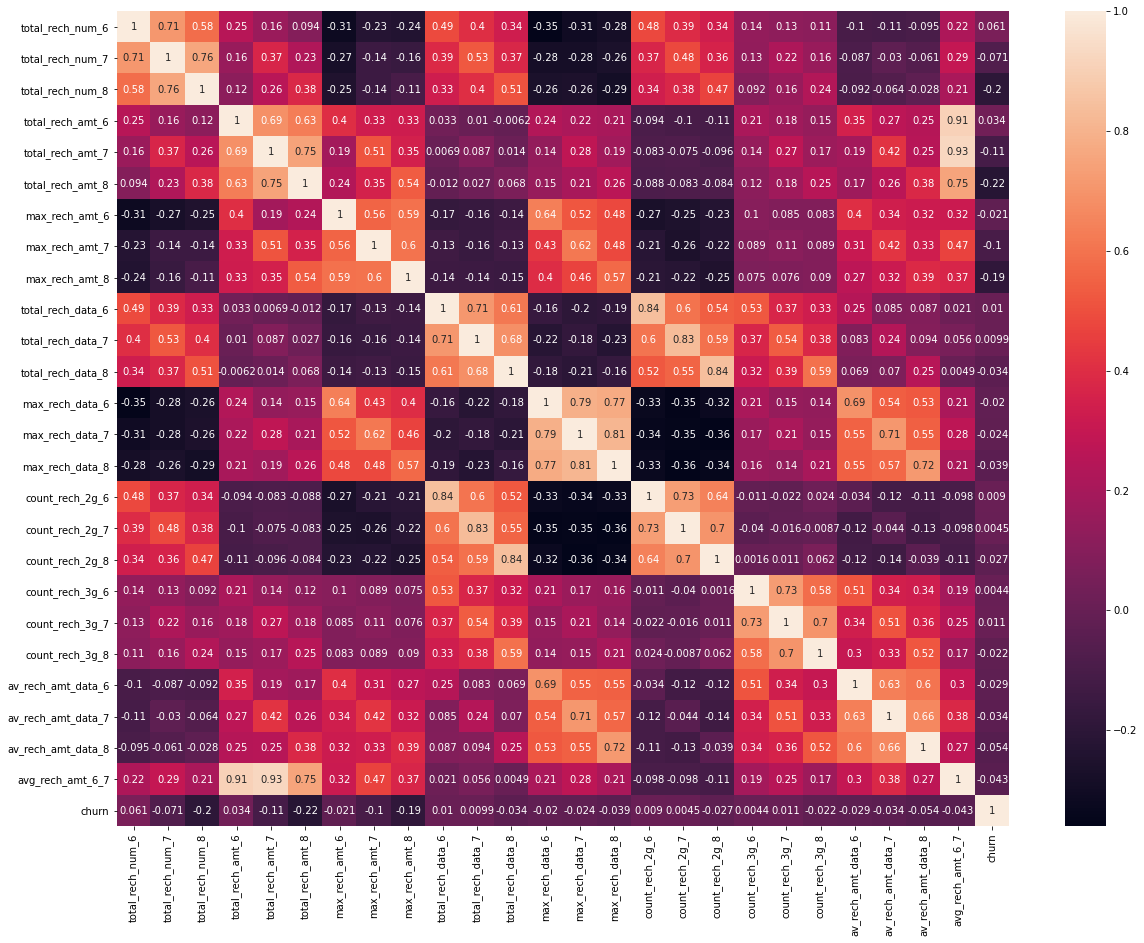

In [64]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df_telecom[cols].select_dtypes(['int64','float64']).corr(),annot=True)
plt.show()

#### Features : total_rech_num_6 : 0.060892

##### Checking Average revenue per user

In [65]:
cols = [x for x in df_telecom.columns if 'arpu' in x]
cols.append('churn')
cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'churn']

In [66]:
df_telecom[cols].select_dtypes(['int64','float64']).corr()

arpu_6    arpu_7    arpu_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  \
arpu_6     1.000000  0.711188  0.633855   0.463796   0.358030   0.325430   
arpu_7     0.711188  1.000000  0.785328   0.280149   0.518809   0.336955   
arpu_8     0.633855  0.785328  1.000000   0.255499   0.337439   0.470399   
arpu_3g_6  0.463796  0.280149  0.255499   1.000000   0.697436   0.666561   
arpu_3g_7  0.358030  0.518809  0.337439   0.697436   1.000000   0.711891   
arpu_3g_8  0.325430  0.336955  0.470399   0.666561   0.711891   1.000000   
arpu_2g_6  0.421830  0.248356  0.227313   0.923106   0.666783   0.640810   
arpu_2g_7  0.325239  0.475285  0.314139   0.675895   0.932416   0.695820   
arpu_2g_8  0.296945  0.310600  0.430231   0.653173   0.702036   0.925879   
churn      0.039873 -0.102000 -0.223223   0.000463  -0.010615  -0.027450   

           arpu_2g_6  arpu_2g_7  arpu_2g_8     churn  
arpu_6      0.421830   0.325239   0.296945  0.039873  
arpu_7      0.248356   0.475285   0.310600 -0.102000  
arpu_8      0.227313   0.314139   0.430231 -0.223223  
arpu_3g_6   0.923106   0.675895   0.653173  0.000463  
arpu_3g_7   0.666783   0.932416   0.702036 -0.010615  
arpu_3g_8   0.640810   0.695820   0.925879 -0.027450  
arpu_2g_6   1.000000   0.691515   0.658609  0.002745  
arpu_2g_7   0.691515   1.000000   0.717669 -0.004100  
arpu_2g_8   0.658609   0.717669   1.000000 -0.023692  
churn       0.002745  -0.004100  -0.023692  1.000000

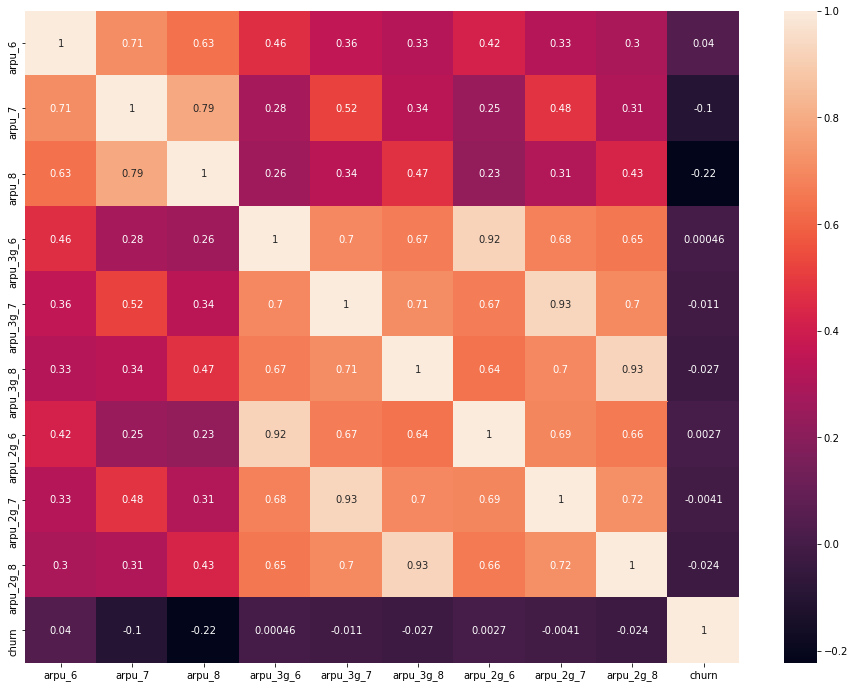

In [67]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_telecom[cols].select_dtypes(['int64','float64']).corr(),annot=True)
plt.show()

#### Features : arpu_6 : .04

#### Checking outgoing calls

In [68]:
#dropping non requried features with NA
df_telecom = df_telecom.drop(['loc_og_t2o_mou','std_og_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1)

In [69]:
cols = [x for x in df_telecom.columns if 'og' in x]
cols.append('churn')
cols

['roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'churn']

In [70]:
df_telecom[cols].select_dtypes(['int64','float64']).corr()

roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
roam_og_mou_6          1.000000       0.546288       0.396036   
roam_og_mou_7          0.546288       1.000000       0.591761   
roam_og_mou_8          0.396036       0.591761       1.000000   
loc_og_t2t_mou_6      -0.044896      -0.017895      -0.009424   
loc_og_t2t_mou_7      -0.015895      -0.027234      -0.007425   
loc_og_t2t_mou_8      -0.004196      -0.019211      -0.022001   
loc_og_t2m_mou_6      -0.089233      -0.039685      -0.020236   
loc_og_t2m_mou_7      -0.032934      -0.056194      -0.023671   
loc_og_t2m_mou_8      -0.011871      -0.033112      -0.050280   
loc_og_t2f_mou_6      -0.029966      -0.011498       0.011699   
loc_og_t2f_mou_7      -0.020490      -0.028046       0.002066   
loc_og_t2f_mou_8      -0.022766      -0.020614      -0.021060   
loc_og_t2c_mou_6      -0.011540      -0.003939      -0.005392   
loc_og_t2c_mou_7       0.001745      -0.007369       0.005276   
loc_og_t2c_mou_8       0.012412      -0.001355       0.004278   
loc_og_mou_6          -0.088720      -0.038046      -0.018505   
loc_og_mou_7          -0.032629      -0.055337      -0.019856   
loc_og_mou_8          -0.011558      -0.034613      -0.047464   
std_og_t2t_mou_6      -0.035529       0.023531       0.035092   
std_og_t2t_mou_7       0.028542      -0.008511       0.036794   
std_og_t2t_mou_8       0.053358       0.031420       0.000743   
std_og_t2m_mou_6      -0.016196       0.035098       0.050532   
std_og_t2m_mou_7       0.050081       0.013016       0.060623   
std_og_t2m_mou_8       0.069970       0.032701       0.018299   
std_og_t2f_mou_6      -0.009444       0.001106       0.008650   
std_og_t2f_mou_7       0.002781      -0.001565       0.014466   
std_og_t2f_mou_8      -0.002678      -0.003535      -0.004442   
std_og_mou_6          -0.035494       0.040128       0.058662   
std_og_mou_7           0.052966       0.003104       0.065842   
std_og_mou_8           0.081895       0.042571       0.012504   
isd_og_mou_6          -0.008069      -0.005930       0.002887   
isd_og_mou_7          -0.007592      -0.006708       0.002756   
isd_og_mou_8          -0.007321      -0.003724       0.001853   
spl_og_mou_6          -0.038709      -0.011858      -0.005373   
spl_og_mou_7          -0.014216      -0.028304      -0.004285   
spl_og_mou_8          -0.007112      -0.017467      -0.021739   
og_others_6           -0.027815      -0.010163      -0.004441   
og_others_7            0.014783       0.018689       0.047377   
og_others_8            0.012448       0.008497       0.028288   
total_og_mou_6        -0.086691       0.014584       0.043998   
total_og_mou_7         0.026886      -0.029077       0.048997   
total_og_mou_8         0.059940       0.018750      -0.015657   
churn                  0.063345       0.088663       0.093396   

                  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
roam_og_mou_6            -0.044896         -0.015895         -0.004196   
roam_og_mou_7            -0.017895         -0.027234         -0.019211   
roam_og_mou_8            -0.009424         -0.007425         -0.022001   
loc_og_t2t_mou_6          1.000000          0.790203          0.719279   
loc_og_t2t_mou_7          0.790203          1.000000          0.830655   
loc_og_t2t_mou_8          0.719279          0.830655          1.000000   
loc_og_t2m_mou_6          0.185769          0.167249          0.190790   
loc_og_t2m_mou_7          0.149788          0.174820          0.172502   
loc_og_t2m_mou_8          0.150986          0.164078          0.202104   
loc_og_t2f_mou_6          0.039822          0.038781          0.041447   
loc_og_t2f_mou_7          0.032843          0.043328          0.043384   
loc_og_t2f_mou_8          0.036170          0.042827          0.058386   
loc_og_t2c_mou_6          0.022776          0.017114          0.017260   
loc_og_t2c_mou_7          0.006488          0.014592          0.004074   
loc_og_t2c_mou_8          0.013446          0.0

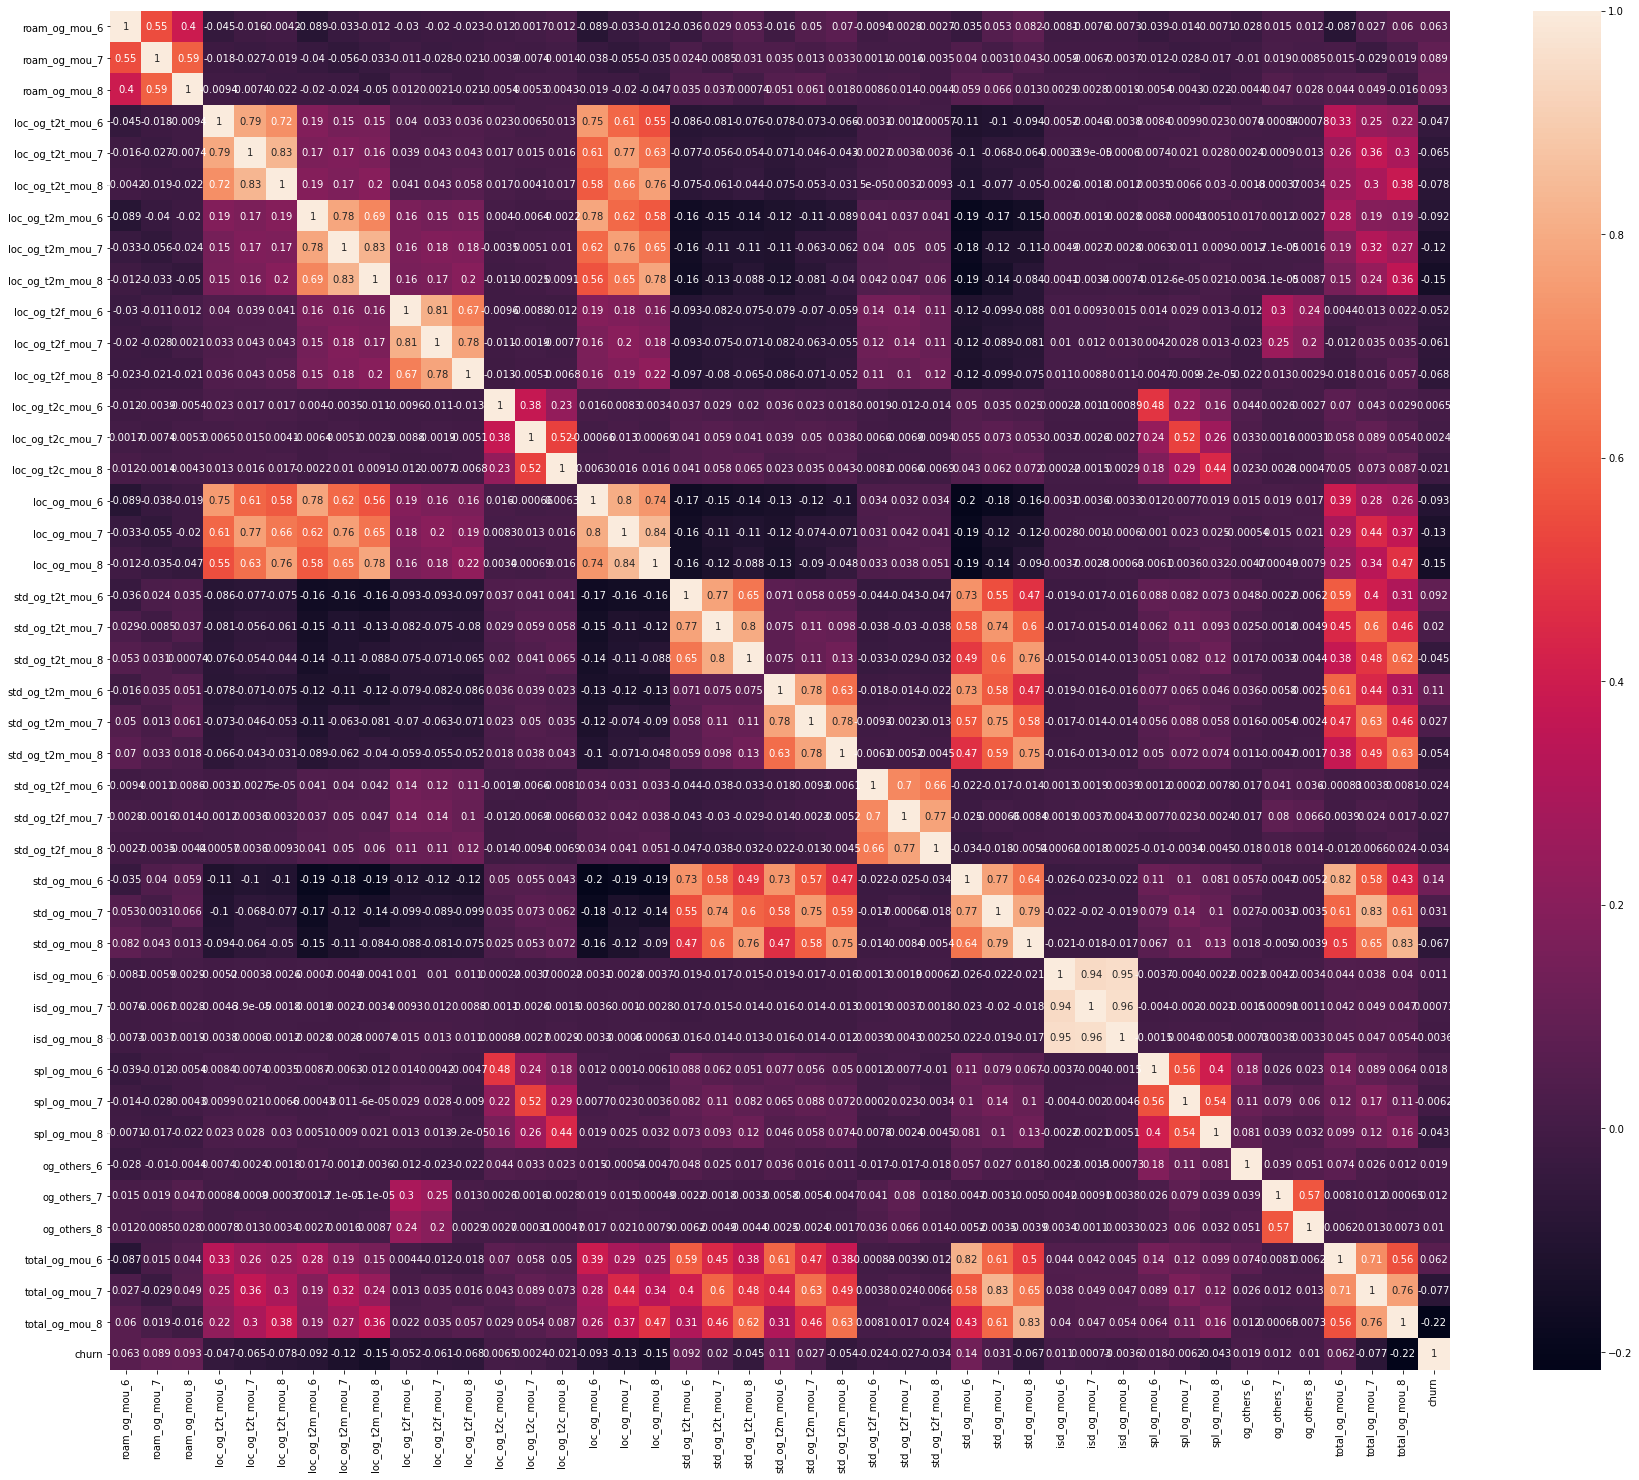

In [71]:
plt.figure(figsize=(30,25))
sns.heatmap(data=df_telecom[cols].select_dtypes(['int64','float64']).corr(),annot=True)
plt.show()

#### Features : roam_og_mou_8,std_og_t2t_mou_6,std_og_t2m_mou_6,  are strong features influencing churn

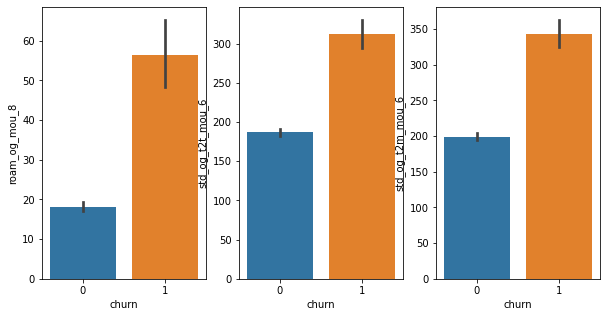

In [94]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.barplot(data=df_telecom,y='roam_og_mou_8',x='churn')
plt.subplot(1,3,2)
sns.barplot(data=df_telecom,y='std_og_t2t_mou_6',x='churn')
plt.subplot(1,3,3)
sns.barplot(data=df_telecom,y='std_og_t2m_mou_6',x='churn')
plt.show()


#### Checking OnNET and Off NET

In [38]:
cols = [x for x in df_telecom.columns if 'net' in x]
cols.append('churn')
cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'churn']

In [126]:
df_telecom_corr = df_telecom[cols].select_dtypes(['int64','float64']).corr()
df_telecom_corr

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
onnet_mou_6          1.000000     0.765769     0.653840     -0.021765   
onnet_mou_7          0.765769     1.000000     0.799678     -0.002749   
onnet_mou_8          0.653840     0.799678     1.000000      0.011700   
offnet_mou_6        -0.021765    -0.002749     0.011700      1.000000   
offnet_mou_7        -0.025820     0.054177     0.052032      0.757364   
offnet_mou_8        -0.019669     0.040899     0.095742      0.617894   
roam_ic_mou_6        0.002303     0.021467     0.035861      0.020771   
roam_ic_mou_7        0.019695     0.002176     0.015226      0.035917   
roam_ic_mou_8        0.039201     0.033070     0.015262      0.050727   
roam_og_mou_6        0.048569     0.060726     0.081773      0.087170   
roam_og_mou_7        0.067963     0.058559     0.073292      0.092506   
roam_og_mou_8        0.066161     0.076063     0.084869      0.096981   
loc_og_t2t_mou_6     0.433523     0.346785     0.306307      0.022592   
loc_og_t2t_mou_7     0.337383     0.475401     0.381233      0.024521   
loc_og_t2t_mou_8     0.308144     0.384746     0.475261      0.036367   
loc_og_t2m_mou_6    -0.058506    -0.046651    -0.024626      0.422749   
loc_og_t2m_mou_7    -0.067702    -0.011610    -0.010179      0.324296   
loc_og_t2m_mou_8    -0.069133    -0.027460     0.021770      0.275856   
loc_og_t2f_mou_6    -0.067267    -0.053263    -0.045402      0.064817   
loc_og_t2f_mou_7    -0.069668    -0.045492    -0.040709      0.046265   
loc_og_t2f_mou_8    -0.070836    -0.049958    -0.028943      0.038680   
loc_og_t2c_mou_6     0.043337     0.033842     0.025981      0.049639   
loc_og_t2c_mou_7     0.039570     0.058661     0.037824      0.039797   
loc_og_t2c_mou_8     0.044397     0.058223     0.065389      0.027124   
loc_og_mou_6         0.229474     0.184043     0.173799      0.296424   
loc_og_mou_7         0.172590     0.299832     0.240622      0.226031   
loc_og_mou_8         0.146146     0.222752     0.312492      0.202871   
std_og_t2t_mou_6     0.851289     0.640452     0.535411     -0.036017   
std_og_t2t_mou_7     0.659279     0.845893     0.670365     -0.019350   
std_og_t2t_mou_8     0.555463     0.676249     0.849788     -0.010605   
std_og_t2m_mou_6     0.017801     0.026674     0.026132      0.825617   
std_og_t2m_mou_7     0.013695     0.070292     0.065551      0.647149   
std_og_t2m_mou_8     0.020487     0.062741     0.096544      0.523179   
std_og_t2f_mou_6    -0.042643    -0.034972    -0.029432      0.038696   
std_og_t2f_mou_7    -0.039389    -0.025007    -0.023687      0.034350   
std_og_t2f_mou_8    -0.042362    -0.032449    -0.023832      0.024966   
std_og_mou_6         0.590849     0.453761     0.381748      0.542958   
std_og_mou_7         0.445898     0.610284     0.490625      0.426834   
std_og_mou_8         0.383414     0.493436     0.631958      0.339897   
isd_og_mou_6        -0.020787    -0.015236    -0.015115      0.075005   
isd_og_mou_7        -0.018769    -0.014029    -0.013782      0.074093   
isd_og_mou_8        -0.017014    -0.012334    -0.012286      0.075546   
spl_og_mou_6         0.079563     0.056803     0.044902      0.104351   
spl_og_mou_7         0.076555     0.108469     0.073461      0.077041   
spl_og_mou_8         0.076004     0.094238     0.115542      0.057316   
total_og_mou_6       0.686565     0.528820     0.456217      0.688298   
total_og_mou_7       0.491114     0.715964     0.577121      0.509289   
total_og_mou_8       0.396727     0.555577     0.730039      0.396037   
loc_ic_t2t_mou_6     0.066129     0.044955     0.043217     -0.005571   
loc_ic_t2t_mou_7     0.059738     0.080790     0.065625     -0.007940   
loc_ic_t2t_mou_8     0.052850     0.067670     0.095226     -0.008450   
loc_ic_t2m_mou_6    -0.086867    -0.082064    -0.069317      0.144485   
loc_ic_t2m_mou_7    -0.092283    -0.048561    -0.046266      0.119992   
loc_ic_t2m_mou_8    -0.094226    -0.061058    -0.027199      0.094153   
loc

In [127]:
(df_telecom_corr['churn']).sort_values(ascending=False)[1:10] #top 10 features based on On NET and Off NET

std_og_mou_6        0.135090
std_og_t2m_mou_6    0.105868
roam_og_mou_8       0.093396
std_og_t2t_mou_6    0.092422
roam_og_mou_7       0.088663
roam_ic_mou_8       0.077005
onnet_mou_6         0.065533
roam_ic_mou_7       0.063659
roam_og_mou_6       0.063345
Name: churn, dtype: float64

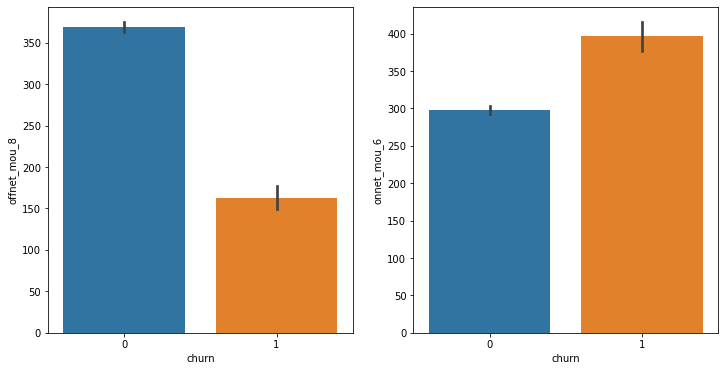

In [96]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(data=df_telecom,y='offnet_mou_8',x='churn')
plt.subplot(1,2,2)
sns.barplot(data=df_telecom,y='onnet_mou_6',x='churn')
plt.show()

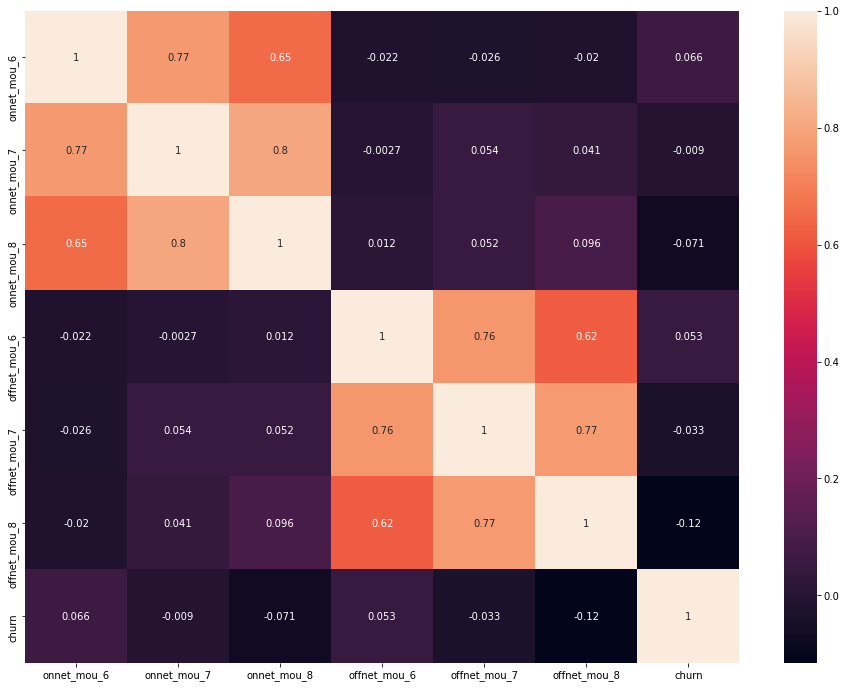

In [40]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_telecom[cols].select_dtypes(['int64','float64']).corr(),annot=True)
plt.show()

##### Features : offnet_mou_8,onnet_mou_6

#### Checking Minutes of usage

In [99]:
df_telecom.drop(['loc_ic_t2o_mou','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace=True)

In [100]:
cols = [x for x in df_telecom.columns if 'mou' in x]
cols.append('churn')
cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_i

In [114]:
pd.options.display.max_rows=200
df_telecom_corr = df_telecom[cols].select_dtypes(['int64','float64']).corr()
df_telecom_corr

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
onnet_mou_6          1.000000     0.765769     0.653840     -0.021765   
onnet_mou_7          0.765769     1.000000     0.799678     -0.002749   
onnet_mou_8          0.653840     0.799678     1.000000      0.011700   
offnet_mou_6        -0.021765    -0.002749     0.011700      1.000000   
offnet_mou_7        -0.025820     0.054177     0.052032      0.757364   
offnet_mou_8        -0.019669     0.040899     0.095742      0.617894   
roam_ic_mou_6        0.002303     0.021467     0.035861      0.020771   
roam_ic_mou_7        0.019695     0.002176     0.015226      0.035917   
roam_ic_mou_8        0.039201     0.033070     0.015262      0.050727   
roam_og_mou_6        0.048569     0.060726     0.081773      0.087170   
roam_og_mou_7        0.067963     0.058559     0.073292      0.092506   
roam_og_mou_8        0.066161     0.076063     0.084869      0.096981   
loc_og_t2t_mou_6     0.433523     0.346785     0.306307      0.022592   
loc_og_t2t_mou_7     0.337383     0.475401     0.381233      0.024521   
loc_og_t2t_mou_8     0.308144     0.384746     0.475261      0.036367   
loc_og_t2m_mou_6    -0.058506    -0.046651    -0.024626      0.422749   
loc_og_t2m_mou_7    -0.067702    -0.011610    -0.010179      0.324296   
loc_og_t2m_mou_8    -0.069133    -0.027460     0.021770      0.275856   
loc_og_t2f_mou_6    -0.067267    -0.053263    -0.045402      0.064817   
loc_og_t2f_mou_7    -0.069668    -0.045492    -0.040709      0.046265   
loc_og_t2f_mou_8    -0.070836    -0.049958    -0.028943      0.038680   
loc_og_t2c_mou_6     0.043337     0.033842     0.025981      0.049639   
loc_og_t2c_mou_7     0.039570     0.058661     0.037824      0.039797   
loc_og_t2c_mou_8     0.044397     0.058223     0.065389      0.027124   
loc_og_mou_6         0.229474     0.184043     0.173799      0.296424   
loc_og_mou_7         0.172590     0.299832     0.240622      0.226031   
loc_og_mou_8         0.146146     0.222752     0.312492      0.202871   
std_og_t2t_mou_6     0.851289     0.640452     0.535411     -0.036017   
std_og_t2t_mou_7     0.659279     0.845893     0.670365     -0.019350   
std_og_t2t_mou_8     0.555463     0.676249     0.849788     -0.010605   
std_og_t2m_mou_6     0.017801     0.026674     0.026132      0.825617   
std_og_t2m_mou_7     0.013695     0.070292     0.065551      0.647149   
std_og_t2m_mou_8     0.020487     0.062741     0.096544      0.523179   
std_og_t2f_mou_6    -0.042643    -0.034972    -0.029432      0.038696   
std_og_t2f_mou_7    -0.039389    -0.025007    -0.023687      0.034350   
std_og_t2f_mou_8    -0.042362    -0.032449    -0.023832      0.024966   
std_og_mou_6         0.590849     0.453761     0.381748      0.542958   
std_og_mou_7         0.445898     0.610284     0.490625      0.426834   
std_og_mou_8         0.383414     0.493436     0.631958      0.339897   
isd_og_mou_6        -0.020787    -0.015236    -0.015115      0.075005   
isd_og_mou_7        -0.018769    -0.014029    -0.013782      0.074093   
isd_og_mou_8        -0.017014    -0.012334    -0.012286      0.075546   
spl_og_mou_6         0.079563     0.056803     0.044902      0.104351   
spl_og_mou_7         0.076555     0.108469     0.073461      0.077041   
spl_og_mou_8         0.076004     0.094238     0.115542      0.057316   
total_og_mou_6       0.686565     0.528820     0.456217      0.688298   
total_og_mou_7       0.491114     0.715964     0.577121      0.509289   
total_og_mou_8       0.396727     0.555577     0.730039      0.396037   
loc_ic_t2t_mou_6     0.066129     0.044955     0.043217     -0.005571   
loc_ic_t2t_mou_7     0.059738     0.080790     0.065625     -0.007940   
loc_ic_t2t_mou_8     0.052850     0.067670     0.095226     -0.008450   
loc_ic_t2m_mou_6    -0.086867    -0.082064    -0.069317      0.144485   
loc_ic_t2m_mou_7    -0.092283    -0.048561    -0.046266      0.119992   
loc_ic_t2m_mou_8    -0.094226    -0.061058    -0.027199      0.094153   
loc

In [125]:
(df_telecom_corr['churn']).sort_values(ascending=False)[1:10] #top 10 features based on from minutes of usage

std_og_mou_6        0.135090
std_og_t2m_mou_6    0.105868
roam_og_mou_8       0.093396
std_og_t2t_mou_6    0.092422
roam_og_mou_7       0.088663
roam_ic_mou_8       0.077005
onnet_mou_6         0.065533
roam_ic_mou_7       0.063659
roam_og_mou_6       0.063345
Name: churn, dtype: float64

In [113]:
a = [0.065533,-0.009028,-0.070572,0.052523,-0.033403,-0.115285,0.041687,0.063659,0.077005,0.063345,0.088663,0.093396,-0.047210,-0.064984,-0.078192,-0.092052,-0.124111,-0.146278,-0.052043,-0.060572,-0.067995,0.006502,0.002375,-0.021260,-0.093345,-0.125288,-0.147412,0.092422,0.020118,-0.045491,0.105868,0.026722,-0.054261,-0.024113,-0.027224,-0.034465,0.135090,0.030900,-0.066950,0.011185,0.000727,-0.003551,0.017659,-0.006217,-0.043021,0.062140,-0.077497,-0.215823,-0.044264,-0.064210,-0.083818,-0.076463,-0.113019,-0.147730,-0.060760,-0.064527,-0.074871,-0.085408,-0.122011,-0.157010,0.020095,-0.005313,-0.034993,0.010733,-0.024362,-0.049924,-0.017893,-0.021623,-0.029505,0.016410,-0.023289,-0.059264,-0.073677,-0.142071,-0.225079,0.002174,-0.007046,-0.050838,0.005008,-0.014710,-0.028519]
a.sort()
a[-10:]

[0.06214,
 0.063345,
 0.063659,
 0.065533,
 0.077005,
 0.088663,
 0.092422,
 0.093396,
 0.105868,
 0.13509]

In [ ]:
'total_og_mou_6','roam_og_mou_6','roam_ic_mou_7'

In [ ]:
plt.figure(figsize=(40,50))
sns.heatmap(data=df_telecom[cols].select_dtypes(['int64','float64']).corr(),annot=True)
plt.show()

##### Checking Age on network

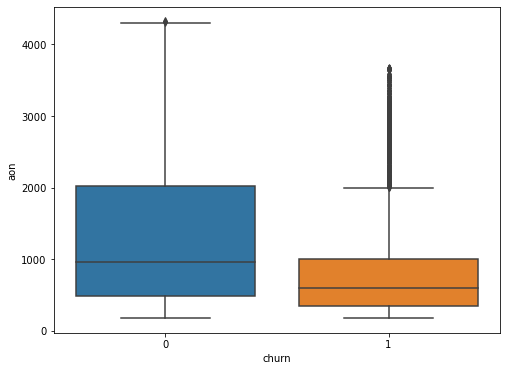

In [78]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_telecom,x='churn',y='aon')
plt.show()

In [ ]:
cols = [x for x in df_telecom.columns if 'rech' in x]
cols.append('churn')
cols

<AxesSubplot:ylabel='total_rech_amt_6'>

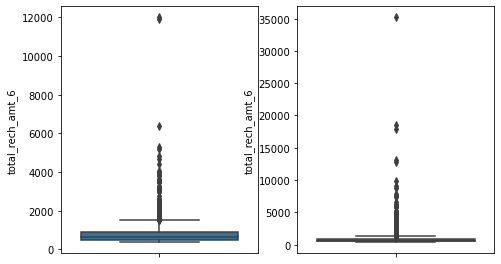

In [22]:
plt.figure(figsize=(12,10))
plt.subplot(2,3,1)
sns.boxplot(data=df_telecom[df_telecom.churn==1],y='total_rech_amt_6')
plt.subplot(2,3,2)
sns.boxplot(data=df_telecom[df_telecom.churn==0],y='total_rech_amt_6')

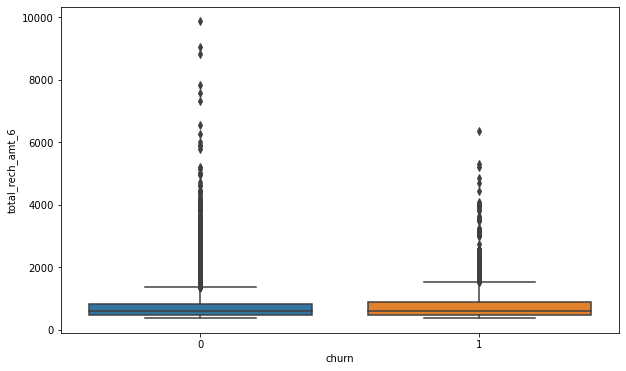

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_telecom[df_telecom.total_rech_amt_6<10000],x='churn',y='total_rech_amt_6')
plt.show()

In [ ]:
df_telecom.total_rech_amt_6.max()

In [ ]:
df_telecom.shape

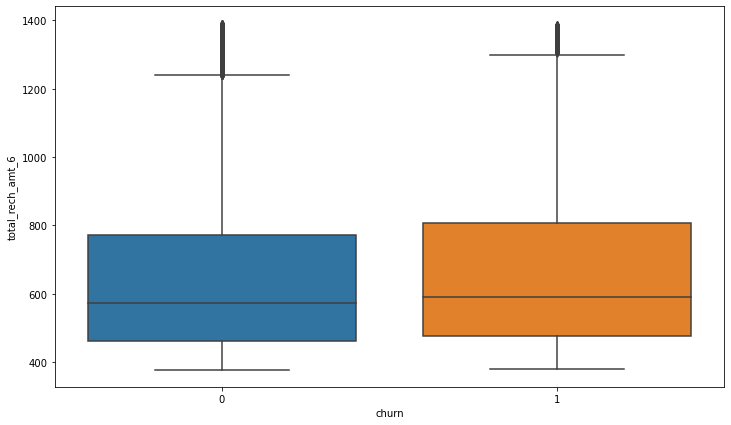

In [28]:
# finding the 1st quartile
q1 = np.quantile(df_telecom.total_rech_amt_6, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df_telecom.total_rech_amt_6, 0.75)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)


plt.figure(figsize=(12, 7))
sns.boxplot(data=df_telecom[(df_telecom.total_rech_amt_6 >= lower_bound) & 
                        (df_telecom.total_rech_amt_6 <= upper_bound)],y='total_rech_amt_6',x='churn')
plt.show()

In [29]:
df_telecom[(df_telecom.total_rech_amt_6 >= lower_bound) & 
                        (df_telecom.total_rech_amt_6 <= upper_bound)].shape

(28184, 174)